In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import bqplot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sklearn

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv
/kaggle/input/instacart-market-basket-analysis/departments.csv
/kaggle/input/instacart-market-basket-analysis/order_products__train.csv
/kaggle/input/instacart-market-basket-analysis/orders.csv
/kaggle/input/instacart-market-basket-analysis/products.csv
/kaggle/input/instacart-market-basket-analysis/aisles.csv


In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [3]:
# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.data_viz_to_coder.ex7 import *
print("Setup Complete")

Setup Complete


In [4]:
order_products_train_df = pd.read_csv("../input/instacart-market-basket-analysis/order_products__train.csv")
order_products_prior_df = pd.read_csv("../input/instacart-market-basket-analysis/order_products__prior.csv")
orders_df = pd.read_csv("../input/instacart-market-basket-analysis/orders.csv")
products_df = pd.read_csv("../input/instacart-market-basket-analysis/products.csv")
aisles_df = pd.read_csv("../input/instacart-market-basket-analysis/aisles.csv")
departments_df = pd.read_csv("../input/instacart-market-basket-analysis/departments.csv")

In [15]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [14]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [5]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


Text(0.5, 1.0, 'Frequency of days since prior order')

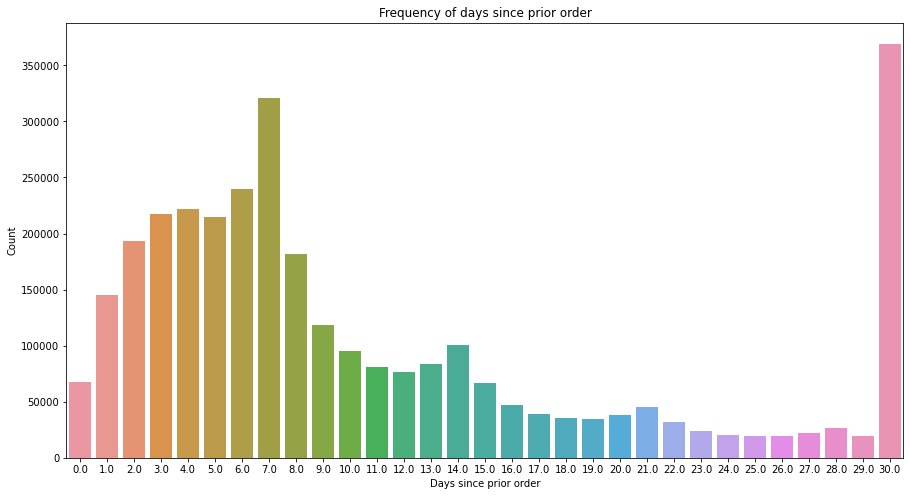

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(x='days_since_prior_order', data=orders_df)
plt.ylabel('Count')
plt.xlabel('Days since prior order')
plt.title('Frequency of days since prior order')

Text(0.5, 1.0, 'Frequency of orders by hour of day')

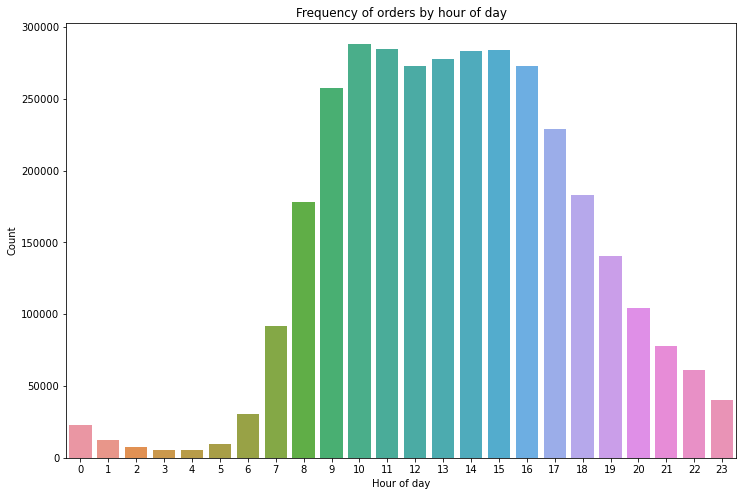

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df)
plt.ylabel('Count')
plt.xlabel('Hour of day')
plt.title("Frequency of orders by hour of day")

In [6]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [8]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
